In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_json(r'/kaggle/input/preprocessed/preprocess_data.json')
df

,name,asin,brand,color,size,price,department,origin,rating,star,...,Not Bleach,Tumble Dry,Pull on,Tie,Zipper,Button,No closure,Elastic,Lace Up,Drawstring
0,3 Pack Mens Athletic Sweatpants with Zipper Po...,B0CT3G46LT,295,5,0,44.99,2,0,909,4.5,...,0,0,0,0,1,0,0,0,0,0
1,3 Pack Mens Athletic Sweatpants with Zipper Po...,B0CYGX1VRB,295,0,2,45.99,2,0,909,4.5,...,0,0,0,0,1,0,0,0,0,0
2,3 Pack Mens Athletic Sweatpants with Zipper Po...,B0CWLJN23H,295,0,3,44.99,2,0,909,4.5,...,0,0,0,0,1,0,0,0,0,0
3,3 Pack Mens Athletic Sweatpants with Zipper Po...,B0CT3JXKKT,295,1,1,44.99,2,0,909,4.5,...,0,0,0,0,1,0,0,0,0,0
4,2Pack Men's Rash Guard UPF 50+ Sun Protection ...,B0CQC72M2D,198,0,4,16.99,2,0,35,4.1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19763,Women's Full Slips Adjustable Spaghetti Strap ...,B0D1TH4KMX,158,10,3,27.99,1,0,15,4.6,...,0,0,0,0,0,0,1,0,0,0
19764,Women's Full Slips Adjustable Spaghetti Strap ...,B0D8SXP3WB,158,7,2,27.99,1,0,15,4.6,...,0,0,0,0,0,0,1,0,0,0
19765,Women's Full Slips Adjustable Spaghetti Strap ...,B0D8SYVMC4,158,1,1,27.99,1,0,15,4.6,...,0,0,0,0,0,0,1,0,0,0
19766,Women's Full Slips Adjustable Spaghetti Strap ...,B0CTYL3FB9,158,5,2,27.99,1,0,15,4.6,...,0,0,0,0,0,0,1,0,0,0


In [2]:
df.columns

Index(['name', 'asin', 'brand', 'color', 'size', 'price', 'department',
       'origin', 'rating', 'star', 'url', 'Polyester', 'Spandex', 'Nylon',
       'Cotton', 'Rayon', 'Acrylic', 'Modal', 'Wool', 'Lyocell', 'Leather',
       'Linen', 'Silk', 'Machine Wash', 'Hand Wash', 'Not Bleach',
       'Tumble Dry', 'Pull on', 'Tie', 'Zipper', 'Button', 'No closure',
       'Elastic', 'Lace Up', 'Drawstring'],
      dtype='object')

In [3]:
df.drop(['name', 'asin', 'url'], axis=1, inplace=True)

In [4]:
df['log_price'] = np.log(df['price'] + 1)
df.drop(['price'], axis=1, inplace=True)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


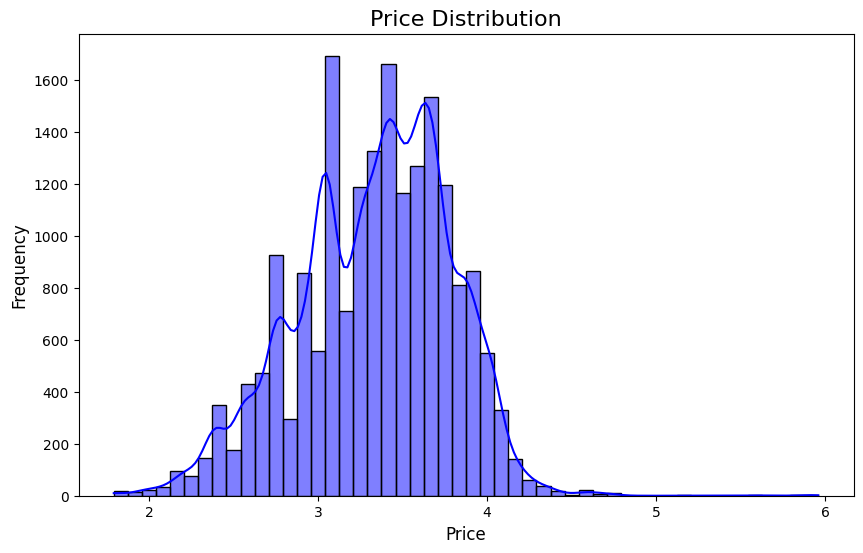

In [5]:
plt.figure(figsize=(10, 6))

sns.histplot(df['log_price'], bins=50, kde=True, color='blue')

plt.title('Price Distribution', fontsize=16)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.show()

In [6]:
df['brand'] = df['brand'].astype('category')
df['brand_encoded'] = df['brand'].cat.codes
df.drop(['brand'], axis=1, inplace=True)

In [7]:
df['color'].isna().sum()

0

In [8]:
df['color'] = df['color'].astype('category')
df['color_encoded'] = df['color'].cat.codes
df.drop(['color'], axis=1, inplace=True)

In [9]:
df['department'] = df['department'].astype('category')
df['department_encoded'] = df['department'].cat.codes
df.drop(['department'], axis=1, inplace=True)

In [10]:
df['origin'] = df['origin'].astype('category')
df['origin_encoded'] = df['origin'].cat.codes
df.drop(['origin'], axis=1, inplace=True)

In [11]:
df.department_encoded.value_counts()

department_encoded
1    12588
2     6334
0      158
Name: count, dtype: int64

In [12]:
df= df.fillna(df.mean())

print(df.isnull().sum())

size                  0
rating                0
star                  0
Polyester             0
Spandex               0
Nylon                 0
Cotton                0
Rayon                 0
Acrylic               0
Modal                 0
Wool                  0
Lyocell               0
Leather               0
Linen                 0
Silk                  0
Machine Wash          0
Hand Wash             0
Not Bleach            0
Tumble Dry            0
Pull on               0
Tie                   0
Zipper                0
Button                0
No closure            0
Elastic               0
Lace Up               0
Drawstring            0
log_price             0
brand_encoded         0
color_encoded         0
department_encoded    0
origin_encoded        0
dtype: int64


In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, make_scorer, r2_score
from xgboost import XGBRegressor
from scipy.stats import randint, uniform

In [14]:
X = df.drop("log_price", axis=1)
y = df["log_price"]


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
xgb_model = XGBRegressor(
    objective="reg:squarederror", 
    random_state=42, 
    tree_method='hist',
    eval_metric='rmse',
    verbosity=2,
    enable_categorical=True
)

In [17]:
param_dist = {
    'learning_rate': uniform(0.05, 0.1),
    'n_estimators': randint(200, 500),
    'max_depth': randint(3, 7),
    'min_child_weight': randint(1, 4),
    'subsample': uniform(0.8, 0.2),
    'colsample_bytree': uniform(0.6, 0.4),
    'gamma': uniform(0, 0.2),
    'reg_alpha': uniform(0, 0.005),
    'reg_lambda': uniform(0, 0.005)
}

In [18]:
import wandb

wandb.init(
    project="xgb_hyperparameter_optimization",
    name="random_search_cv",
    config=param_dist
)

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: khaihoang004 (khaihoang004-hanoi-university-of-science-and-technology). Use `wandb login --relogin` to force relogin


In [19]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)

random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist, 
    n_iter=150,
    scoring=['r2', 'neg_median_absolute_error'],
    cv=cv,
    verbose=2,
    refit='neg_median_absolute_error', 
    n_jobs=-1           # Use all available cores
)

In [20]:
random_search.fit(X_train, y_train)

cv_results = random_search.cv_results_
for i, params in enumerate(cv_results['params']):
    wandb.log({
        "iteration": i,
        "params": params,
        "Mean Test R^2": cv_results['mean_test_r2'][i],
        "Mean Test Negative MAE": cv_results['mean_test_neg_median_absolute_error'][i]
    })


wandb.log({
    "best_score": random_search.best_score_,
    "best_params": random_search.best_params_,
})
wandb.finish() 

Fitting 5 folds for each of 150 candidates, totalling 750 fits
[CV] END colsample_bytree=0.6415200959177604, gamma=0.08303397509474948, learning_rate=0.07234001403269091, max_depth=4, min_child_weight=1, n_estimators=310, reg_alpha=0.002386150913672918, reg_lambda=0.0011408982272327435, subsample=0.9010315539520753; total time=   0.8s
[CV] END colsample_bytree=0.6415200959177604, gamma=0.08303397509474948, learning_rate=0.07234001403269091, max_depth=4, min_child_weight=1, n_estimators=310, reg_alpha=0.002386150913672918, reg_lambda=0.0011408982272327435, subsample=0.9010315539520753; total time=   0.8s
[CV] END colsample_bytree=0.6415200959177604, gamma=0.08303397509474948, learning_rate=0.07234001403269091, max_depth=4, min_child_weight=1, n_estimators=310, reg_alpha=0.002386150913672918, reg_lambda=0.0011408982272327435, subsample=0.9010315539520753; total time=   0.8s
[CV] END colsample_bytree=0.6415200959177604, gamma=0.08303397509474948, learning_rate=0.07234001403269091, max_dep

best_score,▁
iteration,▁▁▁▁▁▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▄▄▄▅▅▅▅▅▅▅▆▆▆▆▆▇▇███
mean_test_neg_median_absolute_error,▄▁▁▆▄▅▅▇▂▄▄▅▄▄▅▆▆▄▆▄▅▂▂▃▅▅▇█▆▇▄▅▇█▃▄▅▃▄▄
mean_test_r2,▇▁▂▆▇▂▆▇▄▅▆▆▅▅▄▃▆▄▆█▆▇█▆▅▆▅▅▆▇▆▂█▇▃▇▇▆▁▅
best_score,-0.05506
iteration,149
mean_test_neg_median_absolute_error,-0.11455
mean_test_r2,0.75337


In [21]:
best_params = random_search.best_params_
best_neg_median_absolute_error = -random_search.best_score_  # Median Absolute Error tốt nhất
best_index = random_search.best_index_  # Chỉ số của mô hình tốt nhất

best_r2 = random_search.cv_results_['mean_test_r2'][best_index]

print("Best Hyperparameters:", best_params)
print("MAE:", best_neg_median_absolute_error)
print("R2:", best_r2)


Best Hyperparameters: {'colsample_bytree': 0.691491049600254, 'gamma': 0.011867700888184719, 'learning_rate': 0.12200055208485854, 'max_depth': 6, 'min_child_weight': 3, 'n_estimators': 327, 'reg_alpha': 0.0037998456330912973, 'reg_lambda': 0.004262662610654066, 'subsample': 0.8779965667893176}
MAE: 0.05506031868681296
R2: 0.8419677426575486


In [22]:
best_model = random_search.best_estimator_


In [23]:
y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

MAE: 0.09652869013390415
RMSE: 0.1618000928030538
R² Score: 0.8651480748313812


In [24]:
import joblib

joblib.dump(best_model, r"xgboost_model.pkl")

['xgboost_model.pkl']